# Proyecto Final Análisis cuantitativo de desplazamiento de centroides de modelados de nicho a causa del cambio climático
---

# Descripción del proyecto y justificación



El cambio climático es un fenómeno que afecta a la región centroamericana con particular fuerza, varios países de la región se encuentran entre los más afectados a nivel global (Eckstein, 2020). Los efectos son diversos, desde perdida de vidas humanas, infraestructura, perdida de cultivos y perdida de biodiversidad. Este último efecto ha sido poco analizado en la región y representa particular interes pues muchas de las especies podrían encontrarse en peligro en un futuro. Esto se ve correlacionado a la perdida de servicios ecosistemicos claves para el bienestar humano, unos de forma directa como la perdida de agua o su purificación, perdida de especies de interes para el ecoturismo o bien de forma indirecta como servicios de regulación (Harrison et al., 2019).

En este pequeño ensayo se pretende mostrar resultados previos de 4 especies modeladas para Honduras, los modelados de nicho fueron realizados con el paquete KUENM para R (Cobos,2019). Sin emgaro, los post analisis se han realizado en Python. El post analisis es de vital importancia pues permite analizar de forma cuantitativa las modificaciones que el cambio climático está causando.



# Antecedentes

Los individuos de una especie tienden a buscar aquellas condiciones que les sean más favorables para su supervivencia. A este conjunto de condiciones se le llama nicho ecológico. Algunas de estas condiciones pueden ser interacciones con otras especies o los mismos individuos de la especie (Variables bióticas) o bien condiciones ambientales, como temperatura, viento, precipitación (Variables abióticas)

El nicho ecológico puede modelarse, usualmente en estas modelaciones no se toma en cuenta las varibales bióticas pues estas tienden a ser a menor escala y no alteran de manera significativa la distribución, a esto se le conoce como hipótesis de ruido eltoniano (Townsend y Soberón, 2012). En cambio, las modelaciones suelen tomar en consideración todas aquellas variables abióticas. Dichas variables pueden predecirse a futuro y por ende, a partir de ellas, se pueden hacer predicciones a futuro del nicho ecológico.

Con el rápido cambio del clima debido al aumento de concentraciones de gases de efecto invernadero en la atmosfera las especies pueden verse amenazadas y conocer el efecto directo que este cambio tendrá en el nicho ecológico de las especies es de gran relevancia.

Para realizar las modelaciones se utilizó el modelo de circulación global MPI-ESM1-2-HR que se ajusta mejor a la región centroamericana (Almazroui et al.,2021). Se trabajó bajo dos caminos de concentración global SSP245 (realista) Y SSP585 (pesimista) del CMIP6, estas capas fueron descargadas de worldclim a resolución de 1km2.

Posterior a la modelación de nicho se buscó calcular de forma cuantitativa el impacto, pues esto evidenciará de manera directa el impacto del cambio climático. El siguiente cuaderno busca evidenciar dicho efecto en el desplazamiento en plano de las diferentes especies. Para esto, a partir de la distribución actual y los modelados a futuro se calculó un centroide por especie y por escenario hasta 2080.


 Conociendo el desplazamiento se busca dar insumos para la planificación de áreas protegidas en el país que contemplen el desplazamiento de nicho ecológico para la conservación de las especies y sus servicios ecosistémicos.Pues en muchos casos las especies no podran ir en busca de su nicho ecológico y se veran en mayor vulnerabilidad debido a esto.

# Descripción del problema y objetivo

El presente documento busca cuantificar el impacto del cambio climático en 4 especies vegetales de Honduras. Aunque ya se cuenta con las modelaciones hechas las mismas no cuentan con un post análisis cuantitativo que permita dar más detalle ante dicho cambio.

In [1]:
#Importamos las librerias a utilizar
import numpy as np
import pandas as pd
import geopandas as geo
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#conectamos jupyter con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Descripción del conjunto de datos

Los datos del estudio surgen a partir de la cuantificación del desplazamiento de los centroides entre distintos escenarios de cambio climático. Las modelaciones fueron realizadas en el programa R, posteriormente se calcularon los centroides de cada polígono y se calcularon las distancias de desplazamiento en el programa Arcgis. También se calculó la dirección de desplazamiento de estos centroides además de su magnitud.

# Procesamiento de datos

In [26]:
#ahora llamo los datos
des=pd.read_csv('/content/drive/MyDrive/proyecto final python/Distancias3.csv',sep=';')
des

,ID,Especie,Periodo,Escenario,Desplazamiento,Dirección
0,1,Dendropanax,Actual-2040,Realista,36501.29,WNW
1,2,Dendropanax,2040-2060,Realista,14313.00,ENE
2,3,Dendropanax,2060-2080,Realista,14344.89,WNW
3,4,Dendropanax,Actual-2080,Realista,37544.73,WNW
4,5,Dendropanax,Actual-2040,Pesimista,12003.73,WSW
5,6,Dendropanax,2040-2060,Pesimista,29500.35,WNW
6,7,Dendropanax,2060-2080,Pesimista,13324.53,SSW
7,8,Dendropanax,Actual-2080,Pesimista,43613.12,WSW
8,9,Eugenia,Actual-2040,Realista,9772.73,ENE
9,10,Eugenia,2040-2060,Realista,12234.48,ENE


Especie         Escenario
Dendropanax     Pesimista    21412.440
                Realista     25423.090
Eugenia         Pesimista    19311.085
                Realista     11003.605
Lonchocarpus    Pesimista     9504.155
                Realista      9069.260
Magnolia        Pesimista     8597.060
                Realista      2917.120
Name: Desplazamiento, dtype: float64
Especie         Escenario
Dendropanax     Pesimista    43613.12
                Realista     37544.73
Eugenia         Pesimista    26962.74
                Realista     19422.87
Lonchocarpus    Pesimista    19894.23
                Realista     14044.94
Magnolia        Pesimista    17259.17
                Realista      5521.80
Name: Desplazamiento, dtype: float64
Especie         Escenario
Dendropanax     Pesimista    12003.73
                Realista     14313.00
Eugenia         Pesimista    13412.75
                Realista      2591.21
Lonchocarpus    Pesimista     4775.86
                Realista      4031.83
Magn

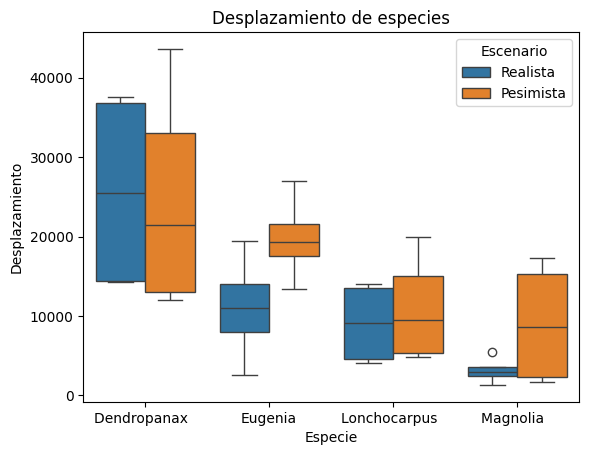

In [41]:
#ahora haré un boxplot para el conjunto de especies para ver en que momento se desplazan más debido al cambio climático

des['Dirección'] = pd.to_numeric(des['Dirección'], errors='coerce')

#filtro datos de un solo escenario, emepzando por el escenario realista
sp=sns.boxplot(data=des, x='Especie', y='Desplazamiento',hue="Escenario")
sp.set_title('Desplazamiento de especies')
sp.set_ylabel('Desplazamiento')
sp.set_xlabel('Especie')

mediana=des.groupby(['Especie','Escenario'])['Desplazamiento'].median()
maximo=des.groupby(['Especie','Escenario'])['Desplazamiento'].max()
minimo=des.groupby(['Especie','Escenario'])['Desplazamiento'].min()


print(mediana)
print(maximo)
print(minimo)

 # Mapas

 ---



In [3]:
#Cargo mapa de Honduras base
Honduras=geo.read_file('/content/drive/MyDrive/proyecto final python/gadm41_HND_shp/gadm41_HND_1.shp')

<Axes: >

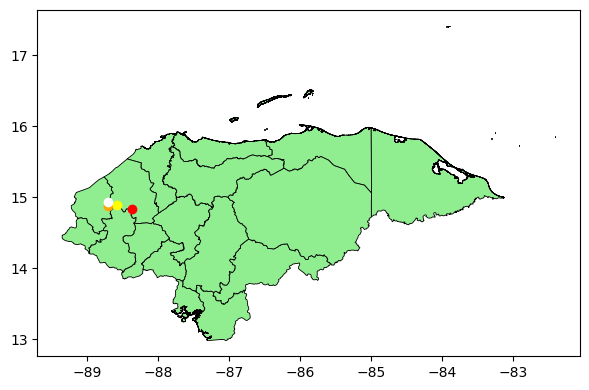

In [13]:
# Ahora voy a cargar un shape con geopandas
dendro_act=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_act.shp')
dendro_4045=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_4045.shp')
dendro_6045=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_6045.shp')
dendro_8045=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_8045.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

dendro_act.plot(ax=lienzo, color="red")
dendro_4045.plot(ax=lienzo, color="orange")
dendro_6045.plot(ax=lienzo, color="yellow")
dendro_8045.plot(ax=lienzo, color="white")


<Axes: >

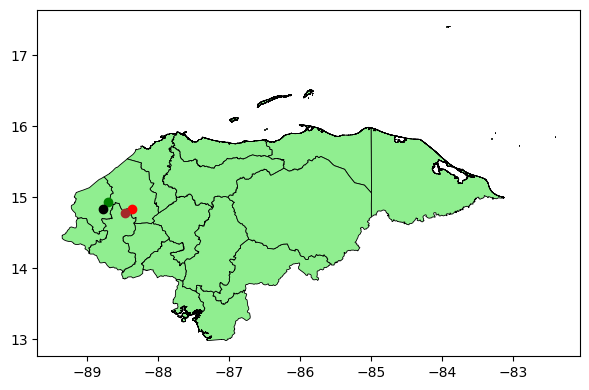

In [14]:
dendro_4085=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_4085.shp')
dendro_6085=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_6085.shp')
dendro_8085=geo.read_file('/content/drive/MyDrive/proyecto final python/dh_10085.shp')

lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

dendro_act.plot(ax=lienzo, color="red")
dendro_4085.plot(ax=lienzo, color="brown")
dendro_6085.plot(ax=lienzo, color="green")
dendro_8085.plot(ax=lienzo, color="black")

<Axes: >

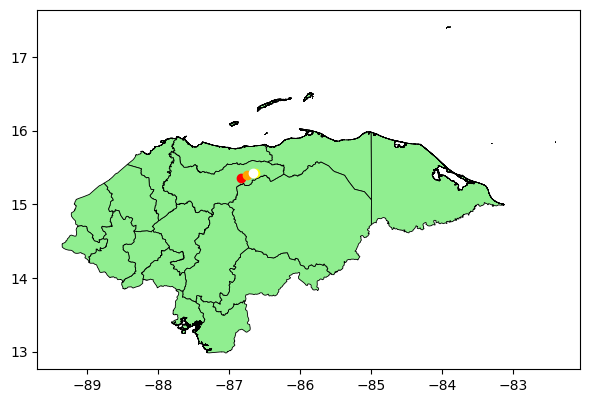

In [16]:
eugenia_act=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_act.shp')
eugenia_4045=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_4045.shp')
eugenia_6045=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_6045.shp')
eugenia_8045=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_8045.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

eugenia_act.plot(ax=lienzo, color="red")
eugenia_4045.plot(ax=lienzo, color="orange")
eugenia_6045.plot(ax=lienzo, color="yellow")
eugenia_8045.plot(ax=lienzo, color="white")

<Axes: >

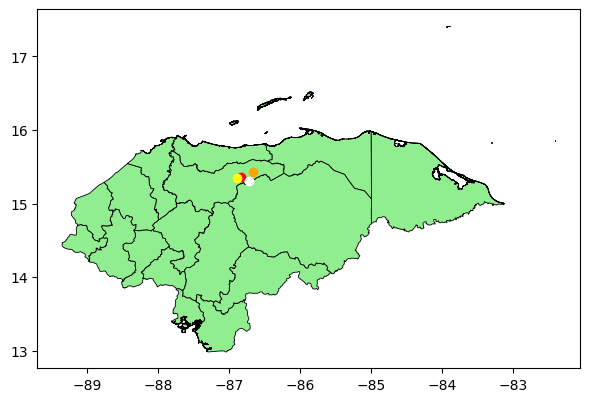

In [18]:
eugenia_4085=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_4085.shp')
eugenia_6085=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_6085.shp')
eugenia_8085=geo.read_file('/content/drive/MyDrive/proyecto final python/ec_10085.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

eugenia_act.plot(ax=lienzo, color="red")
eugenia_4085.plot(ax=lienzo, color="orange")
eugenia_6085.plot(ax=lienzo, color="yellow")
eugenia_8085.plot(ax=lienzo, color="white")

<Axes: >

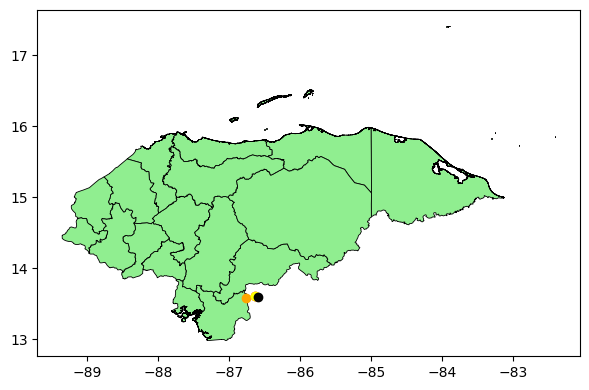

In [25]:
lon_act=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_act.shp')
lon_4045=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_4045.shp')
lon_6045=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_6045.shp')
lon_8045=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_8045.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

lon_act.plot(ax=lienzo, color="red")
lon_4045.plot(ax=lienzo, color="orange")
lon_6045.plot(ax=lienzo, color="yellow")
lon_8045.plot(ax=lienzo, color="BLACK")

<Axes: >

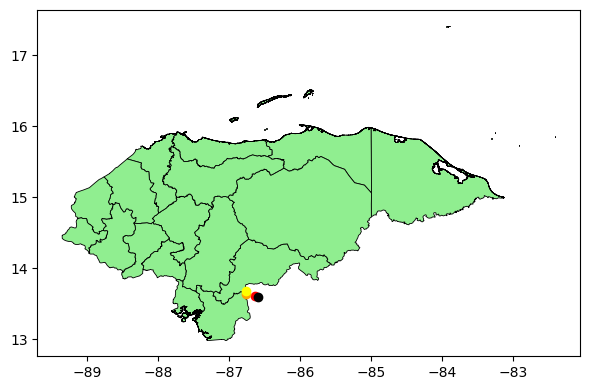

In [22]:
lon_4085=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_4085.shp')
lon_6085=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_6085.shp')
lon_8085=geo.read_file('/content/drive/MyDrive/proyecto final python/ly_10085.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

lon_act.plot(ax=lienzo, color="red")
lon_4085.plot(ax=lienzo, color="orange")
lon_6085.plot(ax=lienzo, color="yellow")
lon_8085.plot(ax=lienzo, color="black")

<Axes: >

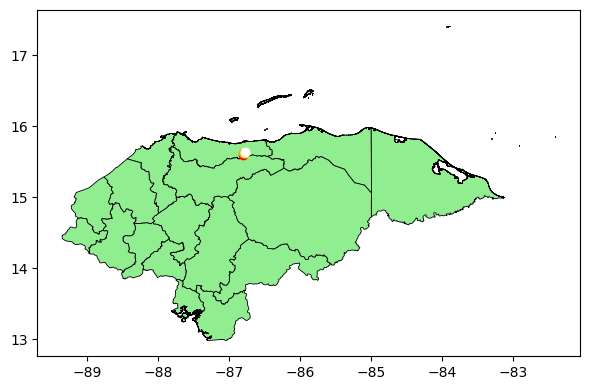

In [23]:
magnolia_act=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_act.shp')
magnolia_4045=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_4045.shp')
magnolia_6045=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_6045.shp')
magnolia_8045=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_8045.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

magnolia_act.plot(ax=lienzo, color="red")
magnolia_4045.plot(ax=lienzo, color="orange")
magnolia_6045.plot(ax=lienzo, color="yellow")
magnolia_8045.plot(ax=lienzo, color="white")

<Axes: >

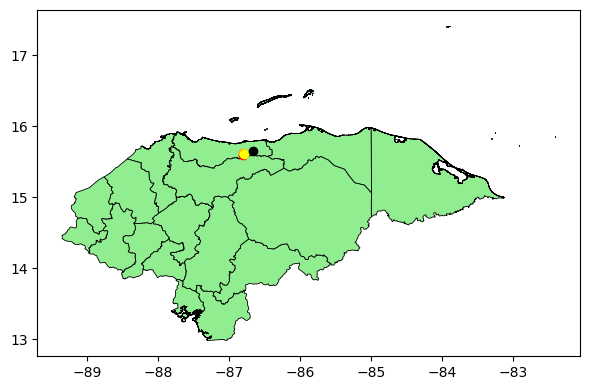

In [24]:
magnolia_4085=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_4085.shp')
magnolia_6085=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_6085.shp')
magnolia_8085=geo.read_file('/content/drive/MyDrive/proyecto final python/ma_10085.shp')


lienzo = Honduras.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6)

magnolia_act.plot(ax=lienzo, color="red")
magnolia_4085.plot(ax=lienzo, color="orange")
magnolia_6085.plot(ax=lienzo, color="yellow")
magnolia_8085.plot(ax=lienzo, color="black")

# Descripción de los resultados

En el boxplot se muestra en el eje x las distintas especies y en el eje y el desplazamiento en metros. Los colores en las gráficas hacen referencia a los dos distintos escenarios manejados: escenario pesimista (ssp585) y escenario realista (ssp245). Se observa que la especie de Dendropanax es la que mayor desplazamiento presenta de todas, seguido por Eugenia, luego Lonchocarpus y por último Magnolia.

La especie dendropanax presenta el mayor desplazamiento superando los 40km. La de menor desplazamiento es la especie Magnolia que no supera los 2km. También se calcularon medianas de desplazamiento para tratar de disminuir el impacto de valores extremos,en estos Dendropanax presenta la mayor mediana con entre 21-26km de desplazamiento dependiendo del escenario. Eugenia presenta la segunda mediana más alta con un desplazamiento de11-19km. Le sigue Lonchocarpus con un desplazamiento promedio de 9km y finalmente magnolia presenta una mediana de movimiento entre los 2 y 8km.

En cuanto a los mapas se puede observar un desplazamiento en general hacia el norte, algunas desplazandose más hacia el este, mientras que otras al oeste. Lonchocarpus es la única especie que presenta sus centroides más al sur de Honduras, mientras el resto se encuentran en el área norte.

# Conclusiones

*   Dendropanax es la especie que más se desplaza en todos los escenarios.
*   Magnolia presenta el menor desplazamiento de todas las especies.
*   El escenario pesimista presenta mayor movimiento en general para todas las especies.






# Referencias

Almazroui, M., Islam, M., Saeed, F. et al. (2021). “Projected Changes in Temperature and Precipitation Over the United States, Central America, and the Caribbean in CMIP6 GCMs”. Earth System Environment, 5, pp. 1–24.

Cobos, M., Peterson, A., Barve, N. & Osorio-Olvera, L. (2019). kuenm: an R package for detailed development of ecological niche models using Maxent. PeerJ 7:e6281 https://doi.org/10.7717/peerj.6281

Ecktein, D., Kunzel, V., Schafer, L. & Winges, M. (2020). Global Climate Risk Index 2020. Germany: Germanwatch eV.

Harrison, P., Berry, P., Simpson, G., Haslett, J., Bicharska, M., Bucur, M., Dunford, R., Egoh, B., Garcia-Llorente, M., Geamana, N., Geertsema, W., Lommenlen, E., Meiresonne & L., Turkelboom, F. (2014). Linkages between biodiversity attributes and ecosystem services: A systematic review. Ecosystem Services, 9: 191-203

Townsend, A. y Soberón, J. (2012). Species distribution modeling and Ecological Niche Modeling: Getting the concepts right. Natureza & Conservacao, 10(2):1-6

